# Modelo de predicción de calidad de mineral de hierro en un proceso de minería

> ### El objetivo del modelo es predecir la concentración de sílice en el mineral al final de un proceso de extracción para saber su pureza

### Importo las librerías

In [49]:
import pickle
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import re
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
Data = pd.read_csv("../data//Dataset_definitivo.csv", index_col="Unnamed: 0")

In [3]:
Data.head(7)

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0         55.2          16.98      3019.53     557.434        395.713   
1         55.2          16.98      3024.41     563.965        397.383   
2         55.2          16.98      3043.46     568.054        399.668   
3         55.2          16.98      3047.36     568.665        397.939   
4         55.2          16.98      3033.69     558.167        400.254   
5         55.2          16.98      3079.10     564.697        396.533   
6         55.2          16.98      3127.79     566.467        392.900   

   Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0      10.0664              1.74                       249.214   
1      10.0672              1.74                       249.719   
2      10.0680              1.74                       249.741   
3      10.0689              1.74                       249.917   
4      10.0697              1.74                       250.203   
5      10.0705              1.74                       250.730   
6      10.0713              1.74                       250.313   

   Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
0                       253.235                       250.576  ...   
1                       250.532                       250.862  ...   
2                       247.874                       250.313  ...   
3                       254.487                       250.049  ...   
4                       252.136                       249.895  ...   
5                       248.906                       249.521  ...   
6                       252.202                       249.082  ...   

   Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                       250.884                    457.396   
1                       248.994                    451.891   
2                       248.071                    451.240   
3                       251.147                    452.441   
4                       248.928                    452.441   
5                       251.873                    444.384   
6                       253.477                    446.185   

   Flotation Column 02 Level  Flotation Column 03 Level  \
0                    432.962                    424.954   
1                    429.560                    432.939   
2                    468.927                    434.610   
3                    458.165                    442.865   
4                    452.900                    450.523   
5                    443.269                    460.449   
6                    444.571                    452.306   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                    443.558                    502.255   
1                    448.086                    496.363   
2                    449.688                    484.411   
3                    446.210                    471.411   
4                    453.670                    462.598   
5                    439.920                    451.588   
6                    431.328                    443.548   

   Flotation Column 06 Level  Flotation Column 07 Level  % Iron Concentrate  \
0                    446.370                    523.344               66.91   
1                    445.922                    498.075               66.91   
2                    447.826                    458.567               66.91   
3                    437.690                    427.669               66.91   
4                    443.682                    425.679               66.91   
5                    433.539                    425.458               66.91   
6                    444.575                    431.251               66.91   

   % Silica Concentrate  
0                  1.31  
1                  1.31  
2                  1.31  
3                  1.31  
4                  1.31  
5                  1.31  
6                  1.31  

[7 rows x 23 columns]

In [4]:
Data.tail()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
737448        49.75           23.2      2710.94     441.052        386.570   
737449        49.75           23.2      2692.01     473.436        384.939   
737450        49.75           23.2      2692.20     500.488        383.496   
737451        49.75           23.2      1164.12     491.548        384.976   
737452        49.75           23.2      1164.12     468.019        384.801   

        Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
737448      9.62129           1.65365                       302.344   
737449      9.62063           1.65352                       303.013   
737450      9.61874           1.65338                       303.662   
737451      9.61686           1.65324                       302.550   
737452      9.61497           1.65310                       300.355   

        Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
737448                       298.786                       299.163  ...   
737449                       301.879                       299.487  ...   
737450                       307.397                       299.487  ...   
737451                       301.959                       298.045  ...   
737452                       292.865                       298.625  ...   

        Flotation Column 07 Air Flow  Flotation Column 01 Level  \
737448                       313.695                    392.160   
737449                       236.700                    401.505   
737450                       225.879                    408.899   
737451                       308.115                    405.107   
737452                       308.115                    413.754   

        Flotation Column 02 Level  Flotation Column 03 Level  \
737448                    430.702                    872.008   
737449                    404.616                    864.409   
737450                    399.316                    867.598   
737451                    466.832                    876.591   
737452                    514.143                    881.323   

        Flotation Column 04 Level  Flotation Column 05 Level  \
737448                    418.725                    497.548   
737449                    418.377                    506.398   
737450                    419.531                    503.414   
737451                    407.299                    502.301   
737452                    378.969                    500.100   

        Flotation Column 06 Level  Flotation Column 07 Level  \
737448                    446.357                    416.892   
737449                    372.995                    426.337   
737450                    336.035                    433.130   
737451                    340.844                    433.966   
737452                    374.354                    441.182   

        % Iron Concentrate  % Silica Concentrate  
737448               64.27                  1.71  
737449               64.27                  1.71  
737450               64.27                  1.71  
737451               64.27                  1.71  
737452               64.27                  1.71  

[5 rows x 23 columns]

In [5]:
Data.shape

(737453, 23)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [7]:
Data.describe()

% Iron Feed  % Silica Feed    Starch Flow     Amina Flow  \
count  737453.000000  737453.000000  737453.000000  737453.000000   
mean       56.294739      14.651716    2869.140569     488.144697   
std         5.157744       6.807439    1215.203734      91.230534   
min        42.740000       1.310000       0.002026     241.669000   
25%        52.670000       8.940000    2076.320000     431.796000   
50%        56.080000      13.850000    3018.430000     504.393000   
75%        59.720000      19.600000    3727.730000     553.257000   
max        65.780000      33.400000    6300.230000     739.538000   

       Ore Pulp Flow    Ore Pulp pH  Ore Pulp Density  \
count  737453.000000  737453.000000     737453.000000   
mean      397.578372       9.767639          1.680380   
std         9.699785       0.387007          0.069249   
min       376.249000       8.753340          1.519820   
25%       394.264000       9.527360          1.647310   
50%       399.249000       9.798100          1.697600   
75%       402.968000      10.038000          1.728330   
max       418.641000      10.808100          1.853250   

       Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  \
count                 737453.000000                 737453.000000   
mean                     280.151856                    277.159965   
std                       29.621288                     30.149357   
min                      175.510000                    175.156000   
25%                      250.281000                    250.457000   
50%                      299.344000                    296.223000   
75%                      300.149000                    300.690000   
max                      373.871000                    375.992000   

       Flotation Column 03 Air Flow  ...  Flotation Column 07 Air Flow  \
count                 737453.000000  ...                 737453.000000   
mean                     281.082397  ...                    290.754856   
std                       28.558268  ...                     28.670105   
min                      176.469000  ...                    185.962000   
25%                      250.855000  ...                    256.302000   
50%                      298.696000  ...                    299.011000   
75%                      300.382000  ...                    301.904000   
max                      364.346000  ...                    371.593000   

       Flotation Column 01 Level  Flotation Column 02 Level  \
count              737453.000000              737453.000000   
mean                  520.244823                 522.649555   
std                   131.014924                 128.165050   
min                   149.218000                 210.752000   
25%                   416.978000                 441.883000   
50%                   491.878000                 495.956000   
75%                   594.114000                 595.464000   
max                   862.274000                 828.919000   

       Flotation Column 03 Level  Flotation Column 04 Level  \
count              737453.000000              737453.000000   
mean                  531.352662                 420.320973   
std                   150.842164                  91.794432   
min                   126.255000                 162.201000   
25%                   411.325000                 356.679000   
50%                   494.318000                 411.974000   
75%                   601.249000                 485.549000   
max                   886.822000                 680.359000   

       Flotation Column 05 Level  Flotation Column 06 Level  \
count              737453.000000              737453.000000   
mean                  425.251706                 429.941018   
std                    84.535822                  89.862225   
min                   166.991000                 155.841000   
25%                   357.653000                 358.497000   
50%                   408.773000                 424.664575   
75%    

## Realizo gráficos para entender las distribuciones y relaciones entre las variables predictoras y la variable target

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

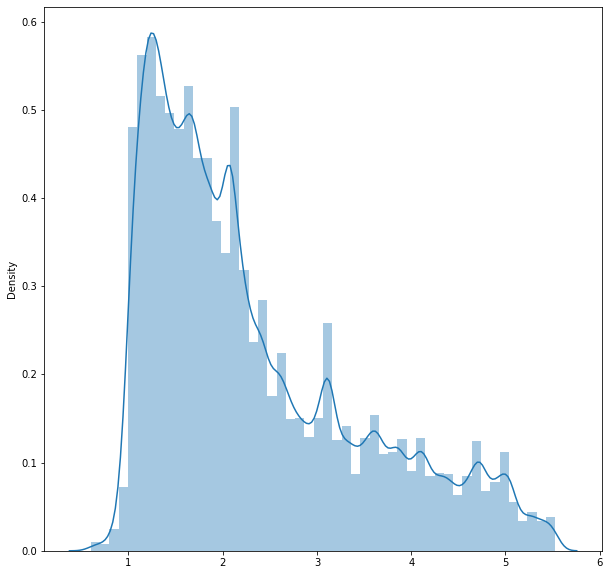

In [8]:
plt.figure(figsize = (10,10))
sns.distplot(x = Data["% Silica Concentrate"])

In [9]:
Data.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

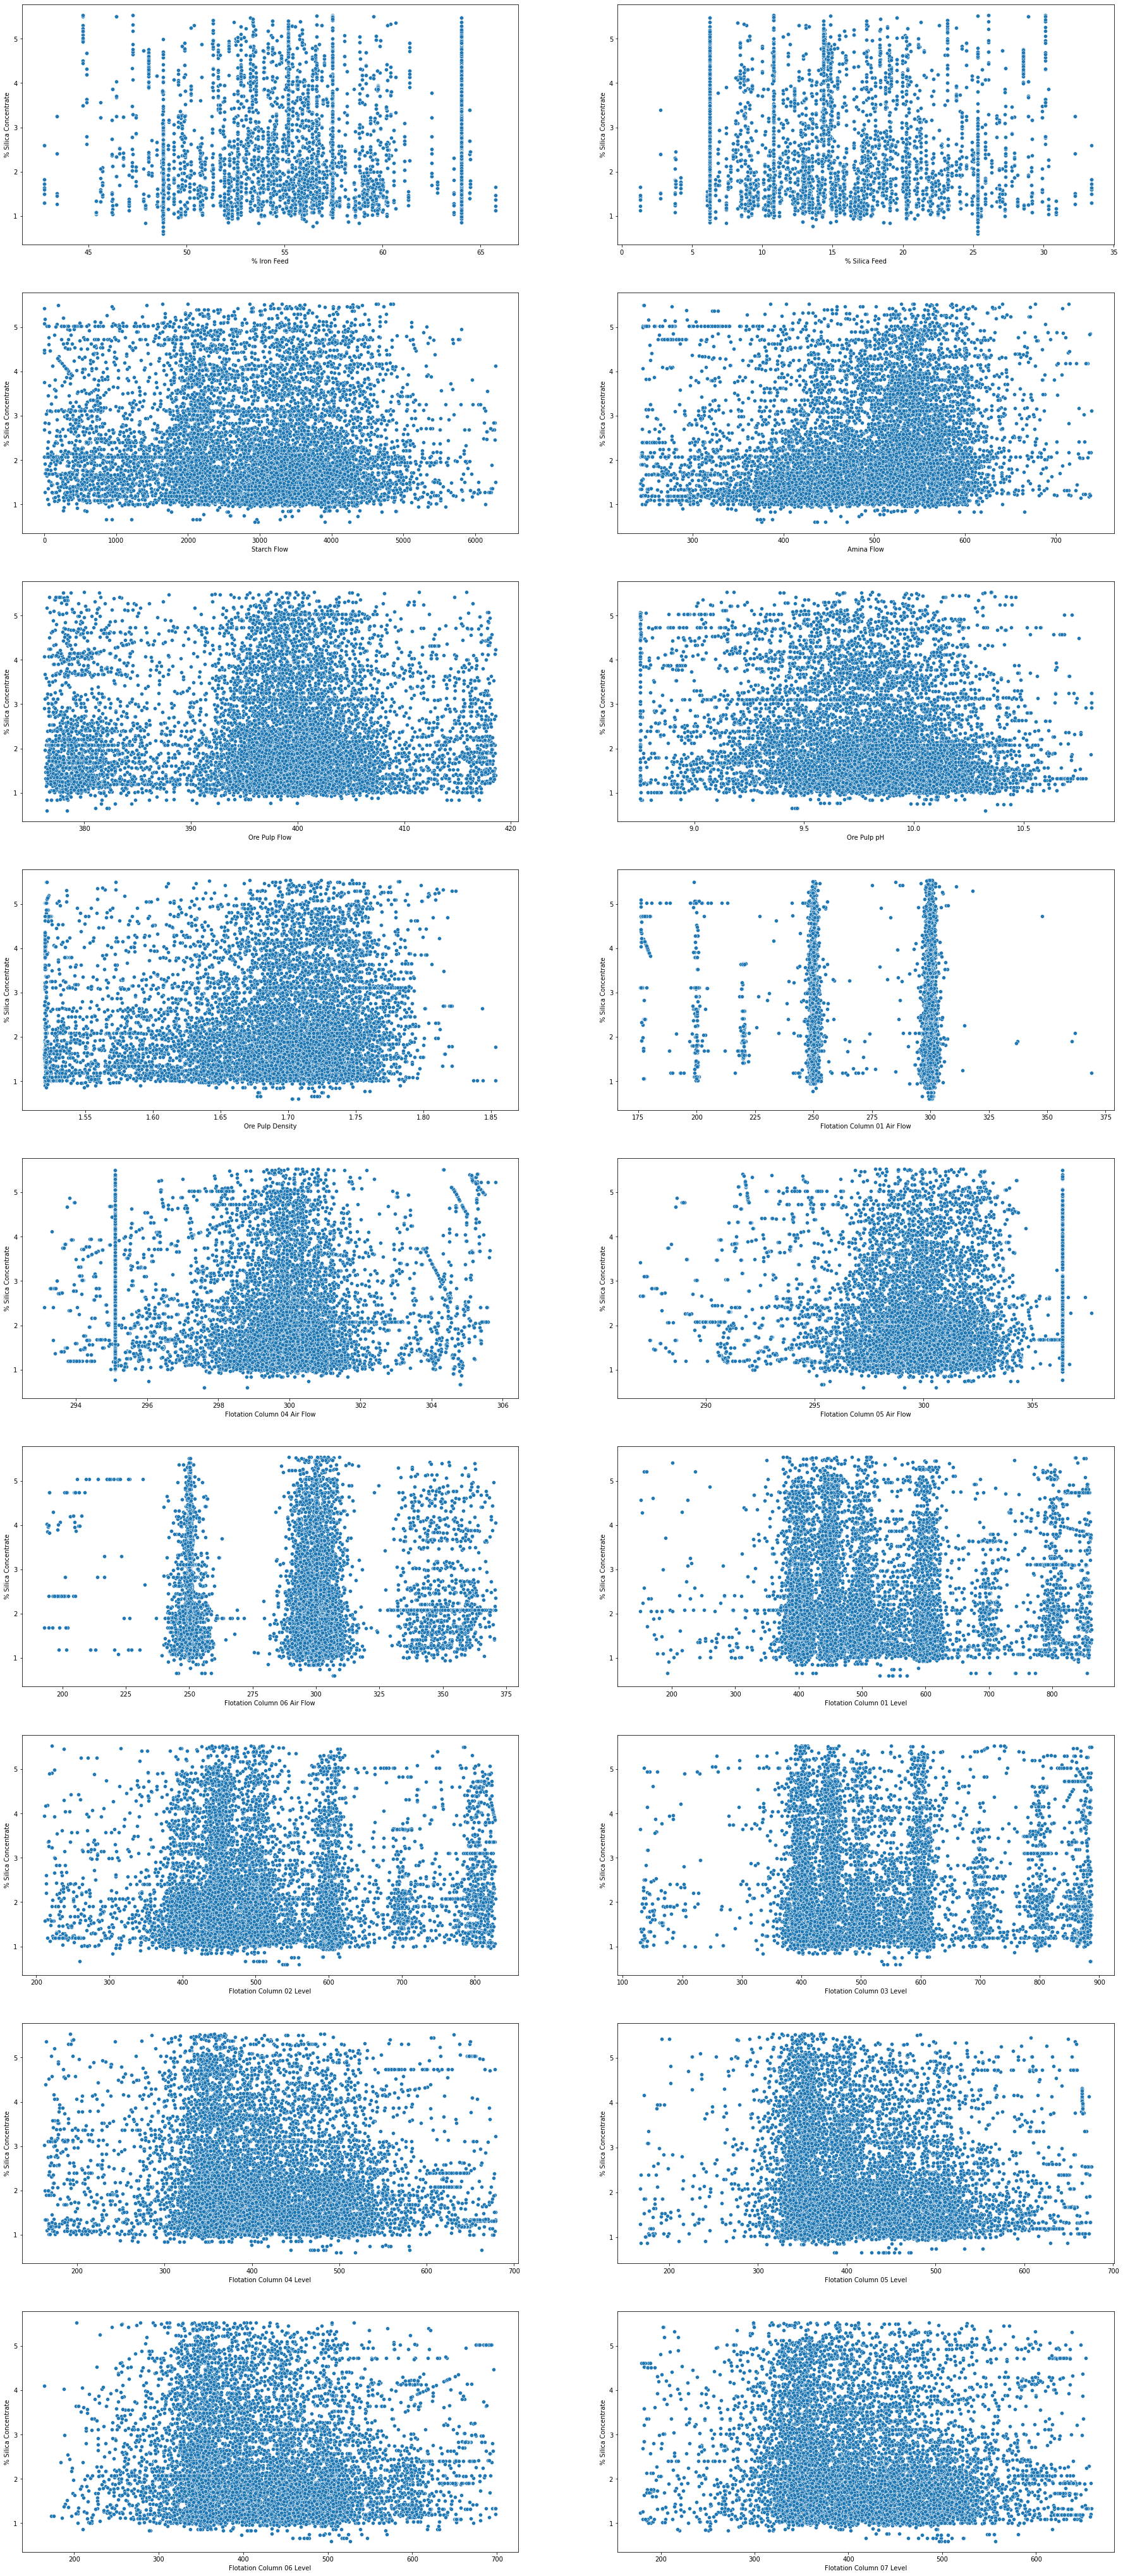

In [10]:
fig = plt.figure()

for i in range(1,19):
        fig.add_subplot(9, 2, i)
        sns.scatterplot(data = Data.sample(10000), 
        x = ['% Iron Feed', '% Silica Feed','Starch Flow', 'Amina Flow',
        'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
        'Flotation Column 01 Air Flow', 'Flotation Column 04 Air Flow',
        'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
        'Flotation Column 01 Level', 'Flotation Column 02 Level',
        'Flotation Column 03 Level', 'Flotation Column 04 Level',
        'Flotation Column 05 Level', 'Flotation Column 06 Level',
        'Flotation Column 07 Level'][i-1], 
        y ="% Silica Concentrate")
    
plt.subplots_adjust(left=1,
                    bottom=1, 
                    right=5, 
                    top=15, 
                    wspace=0.2)

<AxesSubplot:>

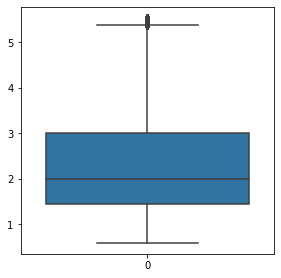

In [11]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(data = Data["% Silica Concentrate"])

<AxesSubplot:xlabel='% Silica Feed', ylabel='% Iron Feed'>

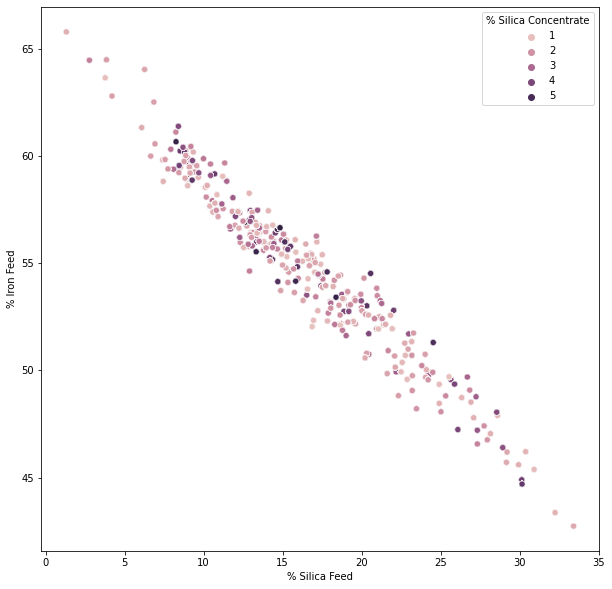

In [12]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = Data, x = "% Silica Feed", y = "% Iron Feed", hue = "% Silica Concentrate")

<AxesSubplot:xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

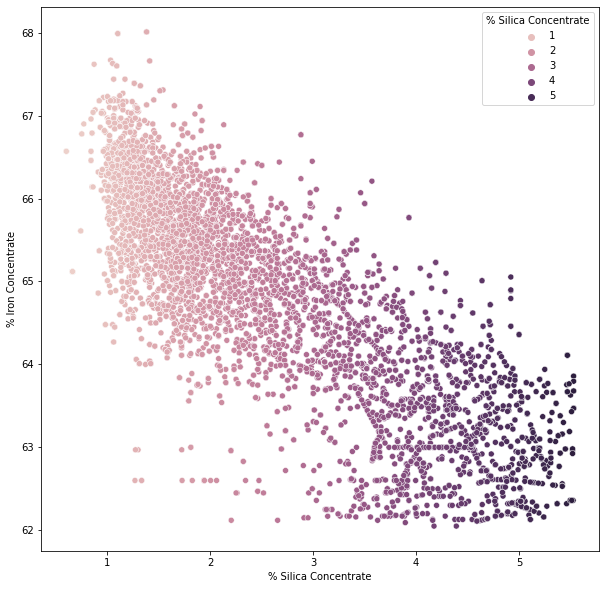

In [13]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = Data.sample(10000), x = "% Silica Concentrate", y = "% Iron Concentrate", hue = "% Silica Concentrate")

<AxesSubplot:>

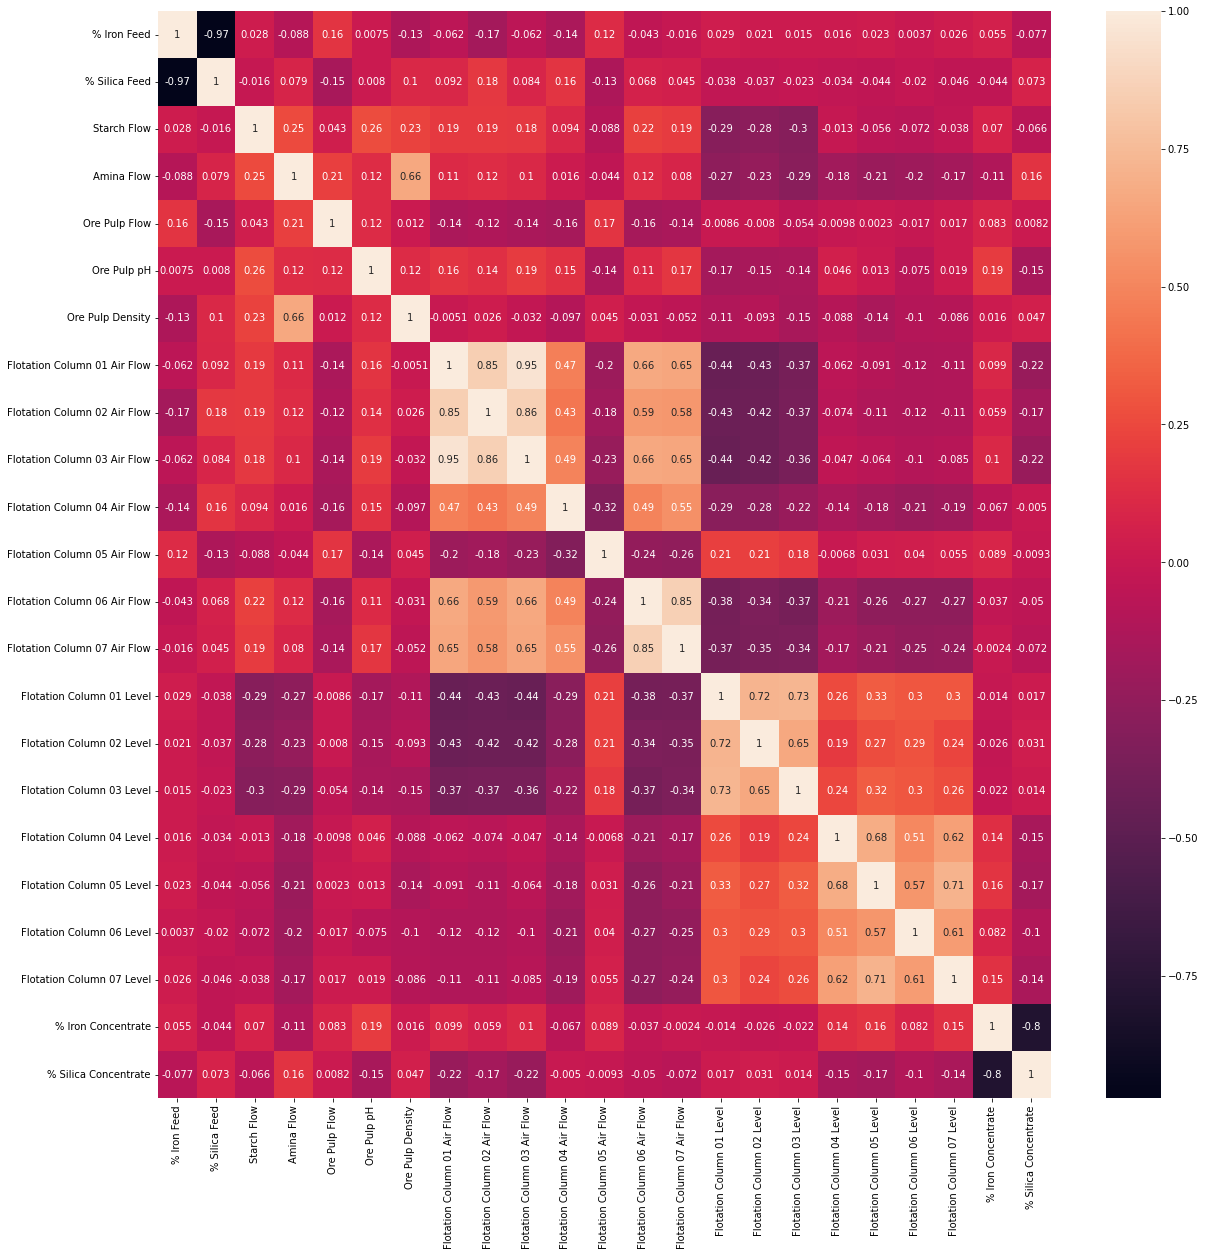

In [14]:
plt.figure(figsize = (20, 20))
sns.heatmap(Data.corr(), annot = True)

In [15]:
Data.corr()[(Data.corr() > 0.8) & (Data.corr() != 1)].dropna(axis = 1, how = "all").dropna(axis = 0, how = "all")

Flotation Column 01 Air Flow  \
Flotation Column 01 Air Flow                           NaN   
Flotation Column 02 Air Flow                      0.848277   
Flotation Column 03 Air Flow                      0.954528   
Flotation Column 06 Air Flow                           NaN   
Flotation Column 07 Air Flow                           NaN   

                              Flotation Column 02 Air Flow  \
Flotation Column 01 Air Flow                      0.848277   
Flotation Column 02 Air Flow                           NaN   
Flotation Column 03 Air Flow                      0.860438   
Flotation Column 06 Air Flow                           NaN   
Flotation Column 07 Air Flow                           NaN   

                              Flotation Column 03 Air Flow  \
Flotation Column 01 Air Flow                      0.954528   
Flotation Column 02 Air Flow                      0.860438   
Flotation Column 03 Air Flow                           NaN   
Flotation Column 06 Air Flow                           NaN   
Flotation Column 07 Air Flow                           NaN   

                              Flotation Column 06 Air Flow  \
Flotation Column 01 Air Flow                           NaN   
Flotation Column 02 Air Flow                           NaN   
Flotation Column 03 Air Flow                           NaN   
Flotation Column 06 Air Flow                           NaN   
Flotation Column 07 Air Flow                      0.854067   

                              Flotation Column 07 Air Flow  
Flotation Column 01 Air Flow                           NaN  
Flotation Column 02 Air Flow                           NaN  
Flotation Column 03 Air Flow                           NaN  
Flotation Column 06 Air Flow                      0.854067  
Flotation Column 07 Air Flow                           NaN

In [16]:
Data.drop(columns = ["Flotation Column 07 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow", "% Iron Concentrate"], inplace = True)

<AxesSubplot:>

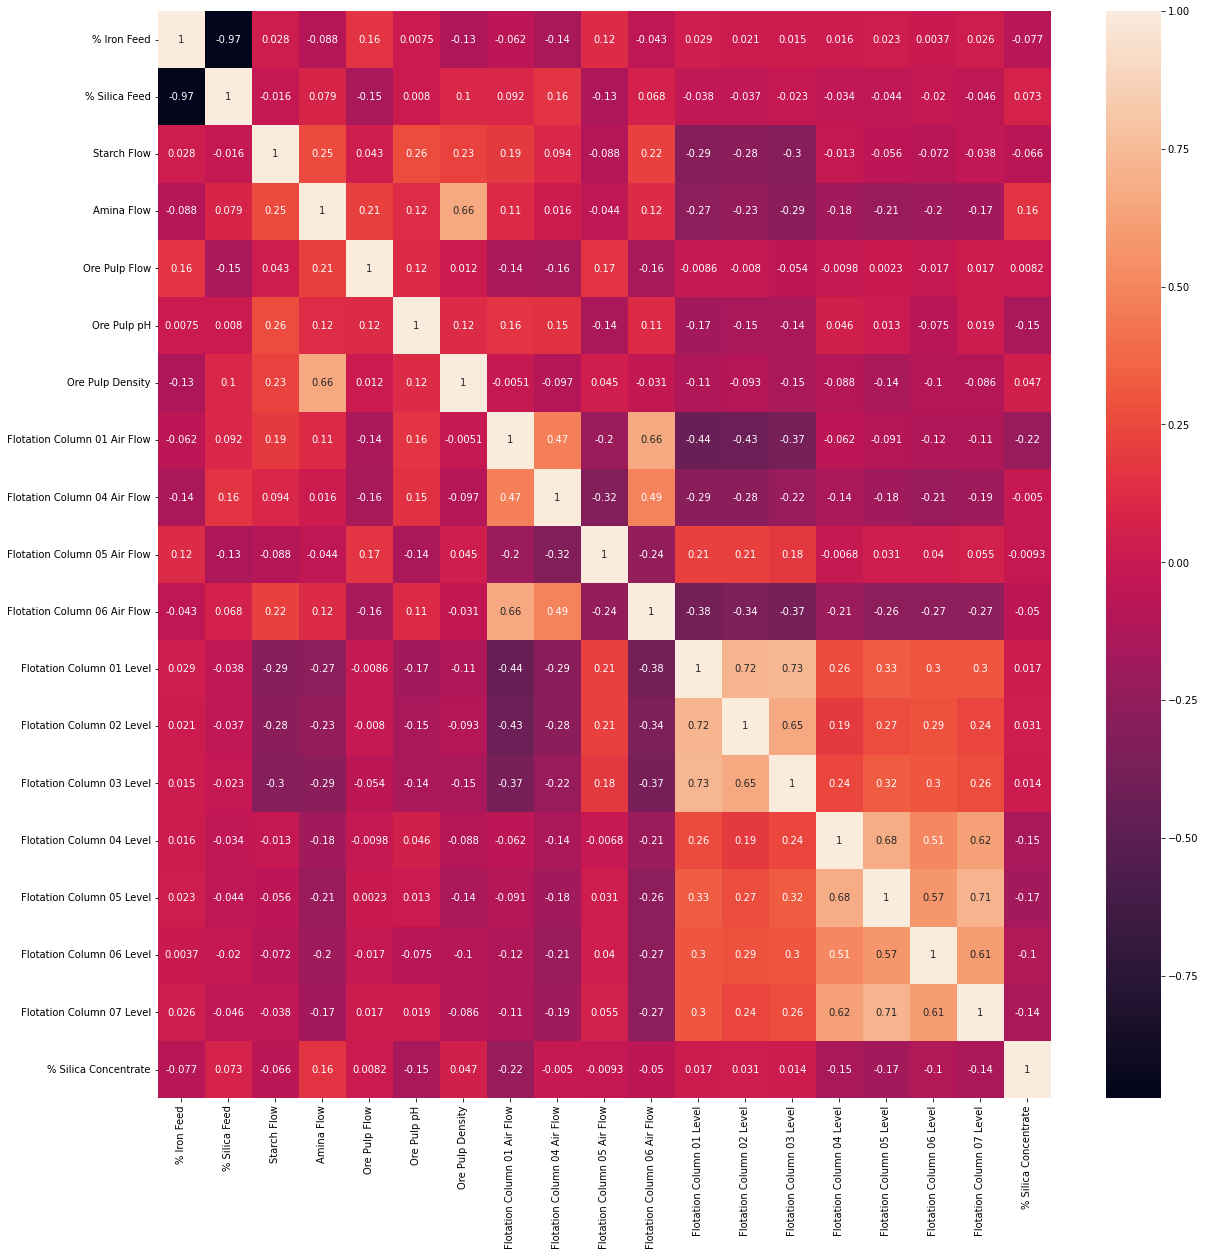

In [17]:
plt.figure(figsize = (20, 20))
sns.heatmap(Data.corr(), annot = True)

<AxesSubplot:xlabel='Amina Flow', ylabel='Ore Pulp Density'>

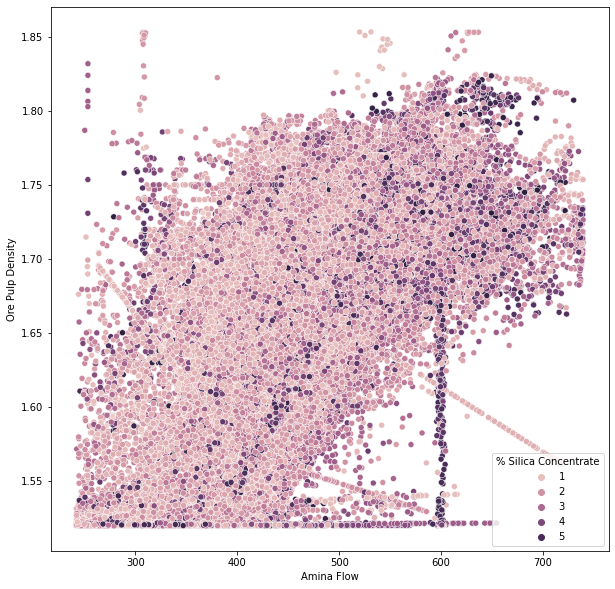

In [18]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = Data.sample(90000), x = "Amina Flow", y = "Ore Pulp Density", hue = "% Silica Concentrate")

In [19]:
X = Data.iloc[:, :-1]

In [20]:
Y = Data.iloc[:, -1]

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 3)

> ## Regresión lineal

In [22]:
modelo = LinearRegression()
modelo.fit(xtrain, ytrain)

LinearRegression()

In [23]:
modelo.score(xtest, ytest)

0.14939437721197002

In [24]:
print("MAE:", metrics.mean_absolute_error(ytest, modelo.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, modelo.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, modelo.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, modelo.predict(xtest))))


MAE: 0.8232663695893134
MSE: 1.0827581012945262
MAPE: 0.403705646205293
RMSE: 1.0405566305081748


## Ridge

In [25]:
ridge = Ridge(0.5)
ridge.fit(xtrain, ytrain)

Ridge(alpha=0.5)

In [26]:
print("MAE:", metrics.mean_absolute_error(ytest, ridge.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, ridge.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, ridge.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, ridge.predict(xtest))))

MAE: 0.8232666354303964
MSE: 1.0827580066831355
MAPE: 0.4037058581882545
RMSE: 1.0405565850462604


## Lasso

In [27]:
lasso = Lasso(0.03)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.03)

In [28]:
print("MAE:", metrics.mean_absolute_error(ytest, lasso.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, lasso.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, lasso.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, lasso.predict(xtest))))

MAE: 0.831456669937264
MSE: 1.0979440984599291
MAPE: 0.40833243921295864
RMSE: 1.0478282771809173


## ElasticNet

In [29]:
elasticnet = ElasticNet(alpha = 1, l1_ratio = 0.5)
elasticnet.fit(xtrain, ytrain)

ElasticNet(alpha=1)

In [30]:
print("MAE:", metrics.mean_absolute_error(ytest, elasticnet.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, elasticnet.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, elasticnet.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, elasticnet.predict(xtest))))

MAE: 0.8432828556204184
MSE: 1.1225665581494535
MAPE: 0.41521928952844767
RMSE: 1.05951241528802


> ## Arbol de decisiones

In [31]:
modelo2 = DecisionTreeRegressor()
modelo2.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [32]:
modelo2.get_depth()

88

In [33]:
modelo2.get_n_leaves()

140570

In [34]:
modelo2.score(xtest, ytest)

0.9173956931296045

In [35]:
print("MAE:", metrics.mean_absolute_error(ytest, modelo2.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, modelo2.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, modelo2.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, modelo2.predict(xtest))))


MAE: 0.06714056412474238
MSE: 0.10514917850246605
MAPE: 0.03237968204857346
RMSE: 0.32426714064558876


> ## RandomForest

In [36]:
modelo3 = RandomForestRegressor(n_estimators=5)
modelo3.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=5)

In [37]:
print("MAE:", metrics.mean_absolute_error(ytest, modelo3.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, modelo3.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, modelo3.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, modelo3.predict(xtest))))


MAE: 0.08930724280096665
MSE: 0.06132293061642355
MAPE: 0.04359415742765344
RMSE: 0.247634671676693


In [38]:
a = modelo3.estimators_[0]

In [39]:
a.get_n_leaves()

93043

## Extra Tree Regressor

In [40]:
modelo4 = ExtraTreesRegressor(n_estimators = 5)
modelo4.fit(xtrain, ytrain)

ExtraTreesRegressor(n_estimators=5)

In [41]:
print("MAE:", metrics.mean_absolute_error(ytest, modelo4.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, modelo4.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, modelo4.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, modelo4.predict(xtest))))

MAE: 0.10701462423929055
MSE: 0.06771337146528751
MAPE: 0.051863077385801475
RMSE: 0.2602179307144062


## KNN


In [42]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [43]:
print("MAE:", metrics.mean_absolute_error(ytest[:500], knn.predict(pd.DataFrame(xtest)[:500])))
print("MSE:", metrics.mean_squared_error(ytest[:500], knn.predict(pd.DataFrame(xtest)[:500])))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest[:500], knn.predict(pd.DataFrame(xtest)[:500])))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest[:500], knn.predict(pd.DataFrame(xtest)[:500]))))

MAE: 0.42430025687952
MSE: 0.4728742627394676
MAPE: 0.2054081270556387
RMSE: 0.6876585364404834


## SVC con pipeline

In [284]:
pipe = Pipeline(steps=[("st", StandardScaler()), ("model", SVR())])

In [285]:
pipe.fit(xtrain, ytrain)

In [ ]:
print("MAE:", metrics.mean_absolute_error(ytest, pipe.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, pipe.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, pipe.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, pipe.predict(xtest))))

## Randomized Search

> ## Random Forest Regressor("Mejor Modelo")

In [45]:
RS = RandomizedSearchCV(estimator = modelo3, param_distributions = {"n_estimators": [17, 18, 19, 20, 21, 22],"max_depth": range(79, 82), "min_samples_split": [3,4,5,6]}, verbose=3, n_iter = 20, cv = 2)
RS.fit(xtrain, ytrain)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2] END max_depth=80, min_samples_split=4, n_estimators=20;, score=0.936 total time= 1.9min
[CV 2/2] END max_depth=80, min_samples_split=4, n_estimators=20;, score=0.938 total time= 1.9min
[CV 1/2] END max_depth=81, min_samples_split=5, n_estimators=17;, score=0.935 total time= 1.6min
[CV 2/2] END max_depth=81, min_samples_split=5, n_estimators=17;, score=0.937 total time= 1.7min
[CV 1/2] END max_depth=80, min_samples_split=4, n_estimators=19;, score=0.936 total time= 1.9min
[CV 2/2] END max_depth=80, min_samples_split=4, n_estimators=19;, score=0.939 total time= 1.9min
[CV 1/2] END max_depth=80, min_samples_split=3, n_estimators=20;, score=0.937 total time= 1.9min
[CV 2/2] END max_depth=80, min_samples_split=3, n_estimators=20;, score=0.939 total time= 1.9min
[CV 1/2] END max_depth=81, min_samples_split=4, n_estimators=17;, score=0.937 total time= 1.6min
[CV 2/2] END max_depth=81, min_samples_split=4, n_estimators=17;, 

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(n_estimators=5),
                   n_iter=20,
                   param_distributions={'max_depth': range(79, 82),
                                        'min_samples_split': [3, 4, 5, 6],
                                        'n_estimators': [17, 18, 19, 20, 21,
                                                         22]},
                   verbose=3)

In [55]:
modelo_final = RS.best_estimator_

In [47]:
print("MAE:", metrics.mean_absolute_error(ytest, RS.best_estimator_.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, RS.best_estimator_.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, RS.best_estimator_.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, RS.best_estimator_.predict(xtest))))

MAE: 0.0831355840522689
MSE: 0.0441219406526661
MAPE: 0.04087105948775494
RMSE: 0.21005223315324714


# **Exportanto el Mejor Modelo**

In [56]:
with open("../model/model_" + datetime.now().strftime('%Y%m%d%H%M%S'), 'wb') as f:
    pickle.dump(modelo_final, f)

In [ ]:
with open('../model/my_model', 'rb') as f:
    MODELOFINAL = pickle.load(f)

## GridSearch

> ### Random Forest Regressor

In [ ]:
GS = GridSearchCV(estimator = modelo3, param_grid = {"n_estimators": [3,5,7,9,11,13],"max_depth": range(80, 86), "min_samples_split": [1,2,3,4,5,6,7,8], "max_leaf_nodes": [59545,60000, 70000, 80000,97189]}, verbose=1.1)
GS.fit(xtrain, ytrain)

In [53]:
GS.best_estimator_

NameError: name 'GS' is not defined

In [ ]:
print("MAE:", metrics.mean_absolute_error(ytest, GS.best_estimator_.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, GS.best_estimator_.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, GS.best_estimator_.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, GS.best_estimator_.predict(xtest))))

> ### Decission Tree Regressor

In [59]:
GS2 = GridSearchCV(estimator = modelo2, param_grid = {"max_depth": range(79, 86), "min_samples_split": [2,3,4,5,6,7,8], "max_leaf_nodes": [40000, 59545,60000, 70000, 80000]}, verbose = 1.1)
GS2.fit(xtrain, ytrain)

NameError: name 'modelo2' is not defined

In [265]:
GS2.best_estimator_

DecisionTreeRegressor(max_depth=81, max_leaf_nodes=59545, min_samples_split=5)

In [ ]:
print("MAE:", metrics.mean_absolute_error(ytest, GS2.best_estimator_.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, GS2.best_estimator_.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, GS2.best_estimator_.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, GS2.best_estimator_.predict(xtest))))

> ### Extra Tree Regressor

In [ ]:
GS3 = GridSearchCV(estimator = modelo4, param_grid = {"max_depth": range(79, 86), "min_samples_split": [2,3,4,5,6,7,8], "max_leaf_nodes": [40000, 59545,60000, 70000, 80000]}, verbose = 1.1)
GS3.fit(xtrain, ytrain)

In [45]:
GS3.best_estimator_

ExtraTreesRegressor(max_depth=82, max_leaf_nodes=60000, n_estimators=5)

In [ ]:
print("MAE:", metrics.mean_absolute_error(ytest, GS3.best_estimator_.predict(xtest)))
print("MSE:", metrics.mean_squared_error(ytest, GS3.best_estimator_.predict(xtest)))
print("MAPE:", metrics.mean_absolute_percentage_error(ytest, GS3.best_estimator_.predict(xtest)))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, GS3.best_estimator_.predict(xtest))))

In [51]:
GS3.best_estimator_.feature_importances_

array([0.04001901, 0.03516672, 0.00901529, 0.01980833, 0.01041696,
       0.02436674, 0.01560818, 0.03694824, 0.02005219, 0.00968847,
       0.00978662, 0.01346624, 0.01017906, 0.01857041, 0.01079596,
       0.00709242, 0.00564517, 0.00578489, 0.69758911])